In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/biosense/CSVFINAL.csv')
print(df.head())

          x          y  Piksel  kanal 1 m20180405.csv  kanal 2 m20180405.csv  \
0  434985.0  5003255.0    1825             -13.083141              -8.488123   
1  434995.0  5003255.0    1826             -13.440999              -8.530323   
2  435005.0  5003255.0    1827             -13.293487              -8.420463   
3  435015.0  5003255.0    1828             -12.968340              -8.238620   
4  435025.0  5003255.0    1829             -13.607218              -8.439531   

   kanal 1 m20180417.csv  kanal 2 m20180417.csv  kanal 1 m20180429.csv  \
0             -14.110695              -9.377714             -13.082385   
1             -14.486169              -9.221827             -13.107114   
2             -13.906779              -8.746058             -12.727474   
3             -13.904457              -8.969219             -12.221130   
4             -13.870691              -9.001353             -12.376390   

   kanal 2 m20180429.csv  kanal 1 m20180529.csv  ...  kanal 1 m20180728.cs

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Učitajte podatke iz CSV fajla
data = pd.read_csv('/content/drive/MyDrive/biosense/CSVFINAL.csv')

# Izdvojte karakteristike (X) uključujući x (longitudu) i y (latitudu)
X = data[['x', 'y']]

# Dodajte ostale karakteristike (36 kanala) ako je potrebno
# Ako su kanali locirani od 4. kolone nadalje:
X = pd.concat([X, data.iloc[:, 4:]], axis=1)

# Standardizujte karakteristike
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kreirajte Gaussian Mixture Model sa 7 komponenti
gmm = GaussianMixture(n_components=7, random_state=42)

# Trenirajte model
gmm.fit(X_scaled)

# Dobijanje predikcija klase za svaki uzorak
labels = gmm.predict(X_scaled)

# Dodajte kolonu sa klasterima u DataFrame
data['Cluster'] = labels

# Prikazuje rezultate klasterizacije
print(data[['x', 'y', 'Cluster']])


                x          y  Cluster
0        434985.0  5003255.0        1
1        434995.0  5003255.0        1
2        435005.0  5003255.0        1
3        435015.0  5003255.0        1
4        435025.0  5003255.0        1
...           ...        ...      ...
3200249  422795.0  4983505.0        4
3200250  422805.0  4983505.0        4
3200251  422815.0  4983505.0        4
3200252  422825.0  4983505.0        4
3200253  422835.0  4983505.0        4

[3200254 rows x 3 columns]


In [ ]:
print(data[['Piksel','x', 'y', 'Cluster']])

          Piksel         x          y  Cluster
0           1825  434985.0  5003255.0        1
1           1826  434995.0  5003255.0        1
2           1827  435005.0  5003255.0        1
3           1828  435015.0  5003255.0        1
4           1829  435025.0  5003255.0        1
...          ...       ...        ...      ...
3200249  5477281  422795.0  4983505.0        4
3200250  5477282  422805.0  4983505.0        4
3200251  5477283  422815.0  4983505.0        4
3200252  5477284  422825.0  4983505.0        4
3200253  5477285  422835.0  4983505.0        4

[3200254 rows x 4 columns]


In [ ]:
frekvencije_cluster_gmm_res = data['Cluster'].value_counts()

print("Sve vrednosti u koloni 'Cluster' i broj ponavljanja:")
print(frekvencije_cluster_gmm_res)

Sve vrednosti u koloni 'Cluster' i broj ponavljanja:
6    829237
1    633999
4    491192
0    461282
2    369577
5    307537
3    107430
Name: Cluster, dtype: int64


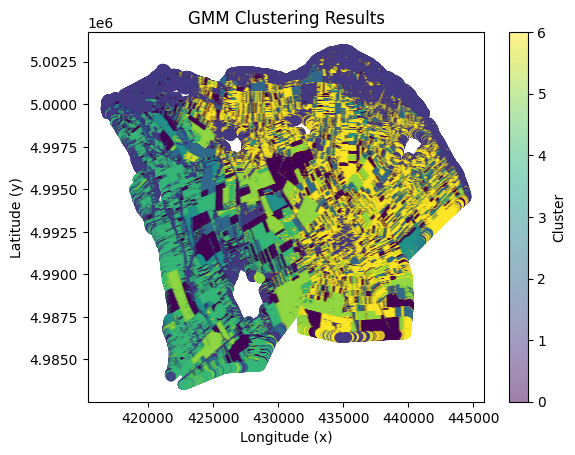

In [ ]:
import matplotlib.pyplot as plt

# Prikazivanje svakog piksela obojenog bojom vrednosti kolone 'Cluster'
plt.scatter(data['x'], data['y'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Longitude (x)')
plt.ylabel('Latitude (y)')
plt.title('GMM Clustering Results')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
path="/content/drive/MyDrive/biosense/rezultati/gmm7.csv"
data.to_csv(path,index=True)


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Putanje do fajlova
csv_file_path = '/content/drive/MyDrive/biosense/rezultati/gmm7.csv'
shp_file_path = '/content/drive/MyDrive/Indjija_2018_GT.shp'

# Željeni CRS
zeljeni_crs = 'EPSG:32634'
# Učitavanje CSV fajla
df_slika = pd.read_csv(csv_file_path)

# Učitavanje Shapefile-a
gdf_parcel = gpd.read_file(shp_file_path)

# Promena CRS-a Shapefile-a
gdf_parcel = gdf_parcel.to_crs(zeljeni_crs)

# Kreiranje geometrije tačaka na osnovu x i y koordinata
geometry_pixels = [Point(xy) for xy in zip(df_slika['x'], df_slika['y'])]

# Kreiranje GeoDataFrame-a sa pikselima
gdf_pixels = gpd.GeoDataFrame(df_slika, crs=gdf_parcel.crs, geometry=geometry_pixels)

# Spajanje piksela sa parcelama prema lokaciji
joined = gpd.sjoin(gdf_pixels, gdf_parcel, how="left", op='within')

# Resetovanje indeksa
joined.reset_index(drop=True, inplace=True)

# Ažuriranje klase u CSV fajlu
df_slika['nova_klasa'] = joined['class'].fillna(999)  # Prilagodi 'class' stvarnom imenu kolone

# Čuvanje ažuriranog CSV fajla
df_slika.to_csv('/content/drive/MyDrive/biosense/NOVO/rezultati/gmm7diff', index=False)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
print(df_slika.head())

   Unnamed: 0         x          y  Piksel  kanal 1 m20180405.csv  \
0           0  434985.0  5003255.0    1825             -13.083141   
1           1  434995.0  5003255.0    1826             -13.440999   
2           2  435005.0  5003255.0    1827             -13.293487   
3           3  435015.0  5003255.0    1828             -12.968340   
4           4  435025.0  5003255.0    1829             -13.607218   

   kanal 2 m20180405.csv  kanal 1 m20180417.csv  kanal 2 m20180417.csv  \
0              -8.488123             -14.110695              -9.377714   
1              -8.530323             -14.486169              -9.221827   
2              -8.420463             -13.906779              -8.746058   
3              -8.238620             -13.904457              -8.969219   
4              -8.439531             -13.870691              -9.001353   

   kanal 1 m20180429.csv  kanal 2 m20180429.csv  ...  kanal 1 m20180914.csv  \
0             -13.082385              -7.779922  ...         

In [ ]:
# Prikaz svih vrednosti u koloni 'nova_klasa' i brojanje ponavljanja
frekvencije_nova_klasa = df_slika['nova_klasa'].value_counts()

print("Sve vrednosti u koloni 'nova_klasa' i broj ponavljanja:")
print(frekvencije_nova_klasa)

Sve vrednosti u koloni 'nova_klasa' i broj ponavljanja:
999.0    3003091
0.0        75006
3.0        65748
1.0        38494
6.0        16499
2.0         1177
7.0          162
5.0           77
Name: nova_klasa, dtype: int64


In [ ]:
# Izbacivanje redova sa vrednošću 999.0 u koloni 'nova_klasa' u mestu
df_slika.drop(df_slika[df_slika['nova_klasa'] == 999.0].index, inplace=True)

# Prikaz prvih nekoliko redova ažuriranog DataFrame-a
print("DataFrame nakon izbacivanja redova sa vrednošću 999.0:")
print(df_slika.head())

DataFrame nakon izbacivanja redova sa vrednošću 999.0:
        Unnamed: 0         x          y  Piksel  kanal 1 m20180405.csv  \
157051      157051  428805.0  5001165.0  580764             -18.611760   
157052      157052  428815.0  5001165.0  580765             -19.390846   
157053      157053  428825.0  5001165.0  580766             -19.473633   
157054      157054  428835.0  5001165.0  580767             -19.807144   
157055      157055  428845.0  5001165.0  580768             -19.680359   

        kanal 2 m20180405.csv  kanal 1 m20180417.csv  kanal 2 m20180417.csv  \
157051              -8.044784             -24.254364              -9.443462   
157052              -8.217490             -25.080910              -8.023976   
157053              -8.072425             -25.149612              -6.169136   
157054              -8.148574             -25.959091              -4.981368   
157055              -8.089493             -27.460094              -4.000487   

        kanal 1 m20180429

In [ ]:
import os

# Putanja do foldera na Google Drive-u
putanja_do_drive_foldera = '/content/drive/MyDrive/biosense/NOVO/rezultati'

# Provera da li folder postoji, ako ne postoji, kreira se
if not os.path.exists(putanja_do_drive_foldera):
    os.makedirs(putanja_do_drive_foldera)

# Naziv CSV fajla
naziv_csv_fajla = 'gmm7KLCL.csv'

# Konačna putanja do CSV fajla
putanja_do_csv_fajla = os.path.join(putanja_do_drive_foldera, naziv_csv_fajla)

# Izaberite samo kolone iz DataFrame-a
df_pixels_xy = df_slika[['Piksel','Cluster', 'nova_klasa']]

# Sačuvajte DataFrame sa samo kolonama 'x' i 'y' u CSV fajl
df_pixels_xy.to_csv(putanja_do_csv_fajla, index=False)

print(f"DataFrame je uspešno sačuvan u CSV fajlu: {putanja_do_csv_fajla}")


DataFrame je uspešno sačuvan u CSV fajlu: /content/drive/MyDrive/biosense/NOVO/rezultati/gmm7KLCL.csv


In [ ]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score

# Učitajte CSV datoteku
df = pd.read_csv('/content/drive/MyDrive/biosense/NOVO/rezultati/gmm7KLCL.csv')

# Pretpostavljamo da su 'stvarna_klasa' i 'predvidjena_klasa' imena kolona u vašem DataFrame-u
y_true = df['nova_klasa']
y_pred = df['Cluster']

# Izračunajte prilagođeni Rand indeks
ari_score = adjusted_rand_score(y_true, y_pred)

print(f"Prilagođeni Rand indeks: {ari_score}")

Prilagođeni Rand indeks: 0.1889403569568168
